In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [9]:
GNW12Ger = candels[-6]

delz = GNW12Ger[0]
nearby = GNW12Ger[1][1]
host = GNW12Ger[1][2]
lc = GNW12Ger[1][3]

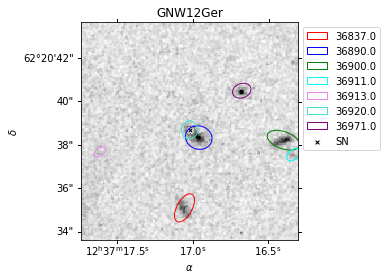

In [11]:
nick = GNW12Ger[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GNW12Ger[1][0]['RA'],GNW12Ger[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.015,val_max = .055 )

In [15]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

id,z,z_spec,z_peak,l95,u95
str8,str8,str12,str12,str12,str12
36837,1.9000,-1.0000,1.9009,1.670,2.151
36890,0.9100,-1.0000,0.9090,0.791,1.008
36900,0.5600,-1.0000,0.5616,0.479,0.656
36911,1.4200,-1.0000,1.4195,0.185,3.080
36913,2.8300,-1.0000,2.8334,0.705,3.288
36920,1.6100,-1.0000,1.6066,1.074,1.815
36971,1.5600,-1.0000,1.5553,1.244,1.891


In [18]:
host[0].mass

id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
str8,str8,str8,str8,str8,str8,str8,str8,str8,str8,str8
36920,1.6100,7.80,0.020,8.50,0.10,9.01,-0.79,-9.80,0.70,7.11e+00


## Published as zspec ~ 0.85 from follow up on host

## I don't think your postage stamp includes a possible host that my catalog found as the host with zphot ~ 1.61 = [1.07, 1.82]

## Not sure why it is not visible in yours? Object is clear in my mosaic unless that is actually the SN; but then why did have galaxy right there as well? AGN?


## The classification plots aren't shown in evernote

## The classification from stardust lc; there is a huge difference between probabilities for different priors in paper. Another reason to check. 

## To that point, not clear on probability notations for z bounds in sncosmo...
## P(Ia|Dz) ~ using the redshift-dependent class prior 
## vs
## P(Ia|Dhost) ~ using the galsnid host galaxy prior

## https://iopscience.iop.org/article/10.1088/0004-6256/148/1/13/pdf